# Midterm Requirements

Part I. 

Implement the following activity to Flask:

1. KNN  ~ classify Jobs

2. K-Means ~ cluster Jobs

3. NBayes Methods [Gaussian, MultiNomial, Bernoulli] ~ classify jobs & compare the accuracy  

4. Linear Regression (Given) ~ Salary Estimation

In [2]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# Load the dataset using pandas
df = pd.read_csv(r"C:\Users\kjson\Desktop\Flask\final_data.csv")

# Split the dataset into features and target
X = df.drop('Job Level', axis=1)
y = df['Job Level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classify using  KNN

In [7]:
# import knn model
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.47368421052631576


Dump the model using pickle

In [ ]:
import pickle

# Dump the model to pickle
filename = 'knn_model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(knn, f)

Cluster Jobs using Kmeans

In [10]:
#import Kmeans model
from sklearn.cluster import KMeans

In [ ]:
# select the features for clustering
X = df[['Experience Required', 'Salary']]

# initialize the KMeans object with the number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# fit the data to the KMeans algorithm
kmeans.fit(X)

# retrieve the labels
labels = kmeans.labels_

# add the cluster labels to the DataFrame
df['Cluster'] = labels

# create a dictionary to map cluster labels to job levels
cluster_map = {0: 'Junior', 1: 'Senior', 2: 'Project Manager', 3: 'CTO'}

# apply the mapping to create a new column for predicted job level
df['Predicted Job Level'] = df['Cluster'].map(cluster_map)

In [ ]:
# dump the model to pickle
filename = 'kmeans_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)

Classify Jobs using Nbayes Methods

- Nbayes Gaussian

In [11]:
#import Nbayes Gaussian Model
from sklearn.naive_bayes import GaussianNB

In [12]:
# load model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6842105263157895


In [15]:
# dump model
filename = 'gaussian_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(gnb, file)

NameError: name 'pickle' is not defined

- Nbayes Multinomial

In [13]:
#import Nbayes Gaussian Model
from sklearn.naive_bayes import MultinomialNB

In [14]:
# Train the Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Test the model
accuracy = nb.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.3157894736842105


In [16]:
# dump model
filename = 'multinomial_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(nb, file)

NameError: name 'pickle' is not defined

- Nbayes Bernouli

In [17]:
# import Bernouli model
from sklearn.naive_bayes import BernoulliNB

In [18]:
# Train the Bernoulli Naive Bayes classifier
nb = BernoulliNB()
nb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3157894736842105


In [19]:
# dump model
filename = 'bernouli_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(nb, file)

Linear Regression -  Salary Estimation


In [20]:
import numpy as np

In [24]:
# select features for salary prediction 
X = df.iloc[:,0:2] # job level and experience
y = df.iloc[:,-1] # target salary


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

X_train = np.array(X_train).reshape((len(X_train),2))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape((len(X_test),2))
y_test = np.array(y_test).reshape((len(y_test),1))


In [25]:
#import linear regression model
from sklearn import linear_model

In [26]:
# train model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
lr.intercept_

array([-3583.64868729])

In [28]:
lr.coef_

array([[ 47143.70977434, -15868.80726911]])

In [30]:
lr.score(X_train,y_train)

0.26950879368809644

In [32]:
y_pred = lr.predict(X_test)
y_pred

array([[90241.05882841],
       [27691.25381794],
       [90241.05882841],
       [90241.05882841],
       [27691.25381794],
       [27691.25381794],
       [43097.34905406],
       [43097.34905406],
       [27691.25381794],
       [43097.34905406],
       [90241.05882841],
       [90241.05882841],
       [90241.05882841],
       [43097.34905406],
       [27691.25381794],
       [11822.44654883],
       [27691.25381794],
       [27691.25381794],
       [43097.34905406],
       [90241.05882841],
       [27691.25381794],
       [90241.05882841],
       [90241.05882841],
       [-4046.36072028],
       [43097.34905406],
       [27691.25381794],
       [43097.34905406],
       [90241.05882841],
       [43097.34905406]])

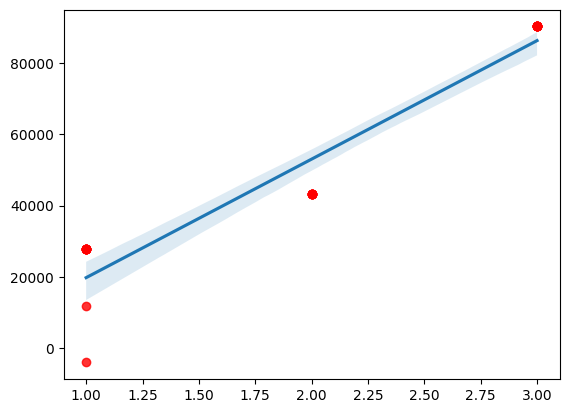

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(10.5)
sns.regplot (x=X_test[:,0], y=y_pred, scatter_kws={'color':'red'})
plt.show()

In [ ]:
# dump model 
pickle.dump(lr, open('model.pkl', 'wb'))
model_dump = pickle.load (open('linearRegression.pkl', 'rb'))